In [1]:
import warnings
warnings.filterwarnings('ignore')

# 정리된 해야할 것

## 1천건의 '고객 데이터' 생성

    - cusno : 고객번호 1000개 : 0~999
    - gender : 0,1 정수 난수 생성 : 0 male, 1 female
    - age : 17 ~ 89사이 정수 난수 생성
    - region : 0, 1, 2 정수 난수 생성 : 0 cityA, 1 cityB, 2 cityC
    - 

In [2]:
import numpy as np
import pandas as pd
from numpy.random import randint as randint
from datetime import datetime, date, time, timedelta

In [3]:
cusno = np.arange(1000)
sr_cusno = pd.Series(cusno)

gender = randint(2, size=1000)
sr_gender = pd.Series(gender)

age = randint(17, 90, size=1000)
sr_age = pd.Series(age)

region = randint(3, size=1000)
sr_region = pd.Series(region)

In [4]:
df_cus = pd.concat([sr_cusno, sr_gender, sr_age, sr_region], axis=1)#, columns=['cusno', 'gender', 'age', 'region'])
df_cus.rename(columns={0:'cusno', 1:'gender',2: 'age', 3:'region'}, inplace=True)
df_cus.head()

,cusno,gender,age,region
0,0,1,27,2
1,1,0,58,0
2,2,1,17,1
3,3,0,66,2
4,4,1,81,0


## 1만건의 '거래 데이터' 생성

    - 거래 no. :  0~9999
    - date : '2020-01-01' ~ '2021-12-31' 기간으로
    - day : 'Mon', ... , 'Sun'
    - time : '00:00' ~ '23:59'
    - 고객 id : 0 ~ 999
    - product : 10:고가, 20: 중가, 30: 저가
    - price : 1000~50000, 1원단위 사용하지 않는 정수
    - quantity : 1~100
    - amount: price * quantity

In [5]:
orderno = np.empty(10000).fill(np.nan)
orderno = pd.Series(orderno)

date_list=list(pd.date_range('2020-01-01','2021-12-31',freq='D')) #랜덤 선택을 위한 date 리스트
date = np.random.choice(date_list, size=10000)
date = pd.Series(date)
#need to sort by date, time

day = date.apply(lambda date : date.weekday())
day.replace(np.arange(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], inplace=True)
day = pd.Series(day)

time_=[]
for i in range(10000) : time_.append(time(randint(24), randint(60), randint(60)))
time_ = pd.Series(time_)

cus_id = randint(1000, size=10000)
cus_id = pd.Series(cus_id)

price = randint(100, 5001, size=10000)*10
price = pd.Series(price)

product =pd.cut(x = price, #데이터 배열
                         bins=[0, 10000, 30000, 50000], # 경계값 리스트
                         labels=[30, 20, 10], #bin 이름
                         include_lowest=True) #첫 경계값 포함

quantity = randint(1, 101, size=10000)
quantity = pd.Series(quantity)

amount = price*quantity

df_purchase = pd.DataFrame({ 'orderno':orderno,
                           'date':date,
                           'day': day,
                           'time': time_,
                            'cus_id': cus_id,
                            'product':product,
                            'price':price,
                            'quantity': quantity,
                            'amount': amount    
                           })

df_purchase.head()

,orderno,date,day,time,cus_id,product,price,quantity,amount
0,NaN,2020-03-22,Sun,12:39:00,945,20,19050,36,685800
1,NaN,2021-01-13,Wed,03:11:13,750,10,36490,79,2882710
2,NaN,2020-08-07,Fri,08:02:58,671,20,13750,17,233750
3,NaN,2021-03-27,Sat,18:13:38,988,10,35870,95,3407650
4,NaN,2021-09-28,Tue,14:47:40,878,30,9560,57,544920


In [6]:
df_purchase.sort_values(by=['date', 'time'], inplace=True)
df_purchase.orderno = np.arange(10000)
df_purchase.reset_index(drop=True, inplace=True) #drop= : 기존 인덱스를 추가하지 않음
df_purchase.head()

,orderno,date,day,time,cus_id,product,price,quantity,amount
0,0,2020-01-01,Wed,01:22:29,284,10,38830,52,2019160
1,1,2020-01-01,Wed,03:23:07,332,10,41410,33,1366530
2,2,2020-01-01,Wed,03:49:01,911,20,26880,55,1478400
3,3,2020-01-01,Wed,05:40:19,747,10,37460,87,3259020
4,4,2020-01-01,Wed,06:07:32,30,20,10400,29,301600


- 이 랜덤하게 만든 데이터를 요약해서 살펴보고, 인사이트 뭐넣을지 생각하지
- 랜덤 데이터를 왜 들여다 모르겠지만 일단 그렇게 하라고.?.?

    
## 위 두개를 합쳐서(???) '통합 데이터 ' 생성
- 이 두개를 단순히 customer no. 로 join하는거?? 같은데???
    
    - 거래 no. :  0~9999
    - date : '2020-01-01' ~ '2021-12-31' 기간으로
    - day : 'Mon', ... , 'Sun'
    - time : '00:00' ~ '23:59'
    - 고객 id : 0 ~ 999
    - product : 10:고가, 20: 중가, 30: 저가
    - price : 1000~50000, 1원단위 사용하지 않는 정수
    - quantity : 1~100
    - amount: price * quantity
    

    - cusno : 고객번호 1000개
    - gender : 0,1 정수 난수 생성
    - age : 0 ~ 80사이 정수 난수 생성
    - region : 1 ~ 10 사이 정수 난수 생성



In [7]:
df_cus.rename({'cusno':'cus_id'}, inplace=True, axis=1)
df_cus.head()

,cus_id,gender,age,region
0,0,1,27,2
1,1,0,58,0
2,2,1,17,1
3,3,0,66,2
4,4,1,81,0


In [8]:
df_purchase.head()

,orderno,date,day,time,cus_id,product,price,quantity,amount
0,0,2020-01-01,Wed,01:22:29,284,10,38830,52,2019160
1,1,2020-01-01,Wed,03:23:07,332,10,41410,33,1366530
2,2,2020-01-01,Wed,03:49:01,911,20,26880,55,1478400
3,3,2020-01-01,Wed,05:40:19,747,10,37460,87,3259020
4,4,2020-01-01,Wed,06:07:32,30,20,10400,29,301600


In [9]:
df_integrated = pd.merge(df_purchase, df_cus, on='cus_id', how='left')
df_integrated.head()

,orderno,date,day,time,cus_id,product,price,quantity,amount,gender,age,region
0,0,2020-01-01,Wed,01:22:29,284,10,38830,52,2019160,1,87,0
1,1,2020-01-01,Wed,03:23:07,332,10,41410,33,1366530,0,22,0
2,2,2020-01-01,Wed,03:49:01,911,20,26880,55,1478400,1,72,2
3,3,2020-01-01,Wed,05:40:19,747,10,37460,87,3259020,0,18,2
4,4,2020-01-01,Wed,06:07:32,30,20,10400,29,301600,1,84,0


## 인사이트를 정한다
    - ex) 코로나로 남성보다 외출 쇼핑 많이 하는 여성 매출 대폭 감소
        - 독립변수 - 성별/  종속변수 - 매출증감여부 / + alpha : 이유를 추측 (이 과제에서는 자기가 story를 만든다?)
    - 만든 탐색적 분석 후 인사이트를 정한다.

### 생성된 데이터 분석

In [10]:
df_explore= pd.read_pickle('./dataset/integrated_purchase.pkl')
df_cus = pd.read_pickle('./dataset/customers.pkl')

In [11]:
df_explore.head()

,orderno,date,day,time,cus_id,product,price,quantity,amount,gender,age,region
0,0,2020-01-01,Wed,03:35:15,733,20,14440,56,808640,0,72,0
1,1,2020-01-01,Wed,06:46:52,692,10,40740,49,1996260,1,63,2
2,2,2020-01-01,Wed,07:54:42,764,30,5520,2,11040,0,76,1
3,3,2020-01-01,Wed,09:10:55,459,30,8630,4,34520,1,31,0
4,4,2020-01-01,Wed,13:30:43,760,20,19970,6,119820,0,89,0


- 매출 증감, 정리해서 보려면 cus_id, amount_20, amount_21, sales면 된다.

In [12]:
# 2020매출, 2021매출
total_amount_20 = df_explore.amount[df_explore.date.dt.year == 2020].sum()
total_amount_21 = df_explore.amount[df_explore.date.dt.year == 2021].sum()
total_amount_20, total_amount_21, total_amount_21 - total_amount_20 # 20년 대비 21년 매출 감소 확인

(6573776770, 6437186650, -136590120)

#### 요약 데이터 생성 by customer

In [13]:
# 각 customer에 대해 
# df_cus[cus_id, gender, age, region] amount_20, amount_21, sales

In [14]:
df_explore.amount[df_explore.cus_id == 733].sum()

9331190

In [15]:
cus_amount_20 = []
cus_amount_21 = []
for id_ in df_cus.cus_id:
    amount_20 = df_explore.amount[(df_explore.cus_id == id_) & (df_explore.date.dt.year == 2020)].sum()
    amount_21 = df_explore.amount[(df_explore.cus_id == id_) & (df_explore.date.dt.year == 2021)].sum()
    cus_amount_20.append(amount_20)
    cus_amount_21.append(amount_21)

In [16]:
df_cus['amount_20'] = cus_amount_20
df_cus['amount_21'] = cus_amount_21
df_cus['sales'] = np.where(df_cus.amount_20<df_cus.amount_21, 1, 0)

In [17]:
df_cus.gender.replace({0:'male', 1: 'female'}, inplace=True)
df_cus.gender = df_cus.gender.astype('category')

In [18]:
df_cus.age = pd.cut(x = age, #데이터 배열
                         bins=[17, 20, 40, 60, 89], # 경계값 리스트
                         labels=['teenager', 'young_adult', 'adult', 'senior'], #bin 이름
                         include_lowest=True) #첫 경계값 포함

In [19]:
df_cus.region.replace({0:'cityA', 1: 'cityB', 2:'cityC'}, inplace=True)
df_cus.region = df_cus.region.astype('category')

In [20]:
df_cus.amount_20 = (df_cus.amount_20/10000).round().astype('int')
df_cus.amount_21 = (df_cus.amount_21/10000).round().astype('int')

In [21]:
df_cus.head()

,cus_id,gender,age,region,amount_20,amount_21,sales
0,0,male,young_adult,cityA,805,0,0
1,1,male,adult,cityC,689,1075,1
2,2,female,teenager,cityC,226,216,0
3,3,male,senior,cityC,691,1010,1
4,4,male,senior,cityB,402,437,1


#### 요약데이터 분석

In [22]:
df_sum = pd.read_pickle('./dataset/sales_by_costomer.pkl')
df_sum.head()

,cus_id,gender,age,region,amount_20,amount_21,sales
0,0,male,senior,cityA,805,0,0
1,1,male,young_adult,cityC,689,1075,1
2,2,female,adult,cityC,226,216,0
3,3,male,young_adult,cityC,691,1010,1
4,4,male,adult,cityB,402,437,1


- 성별 gender

In [23]:
grouped_gender = df_sum.groupby(['gender'])
print(round(grouped_gender.get_group('female').sales.mean(), 2))
print(round(grouped_gender.get_group('male').sales.mean(), 2))

0.47
0.52


In [24]:
agg_gender = grouped_gender.agg({'amount_20': 'sum', 'amount_21':'sum'})
agg_gender

,amount_20,amount_21
gender,,
female,329911,310274
male,327448,333437


<AxesSubplot:xlabel='gender'>

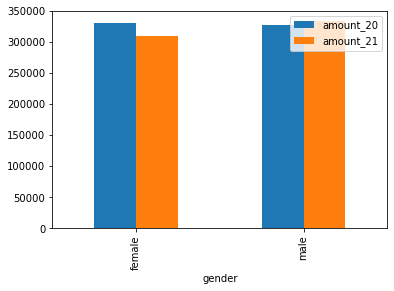

In [25]:
agg_gender.plot(kind = 'bar')

- 나이 age

In [26]:
grouped_age = df_sum.groupby('age')

In [27]:
age_agg = grouped_age.agg({'amount_20': 'sum', 'amount_21':'sum'})
age_agg

,amount_20,amount_21
age,,
teenager,42148,42891
young_adult,173547,172089
adult,190320,172909
senior,251344,255822


<AxesSubplot:xlabel='age'>

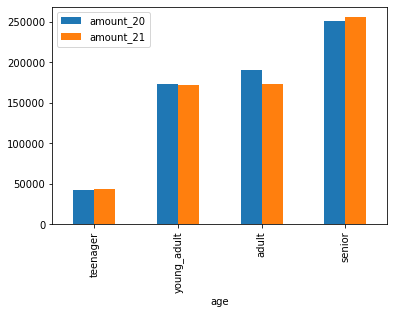

In [28]:
age_agg.plot(kind='bar')

- 지역 regioin

In [29]:
grouped_region = df_sum.groupby('region')
region_agg = grouped_region.agg({'amount_20': 'sum', 'amount_21':'sum'})
region_agg

,amount_20,amount_21
region,,
cityA,206493,199928
cityB,234789,224300
cityC,216077,219483


<AxesSubplot:xlabel='region'>

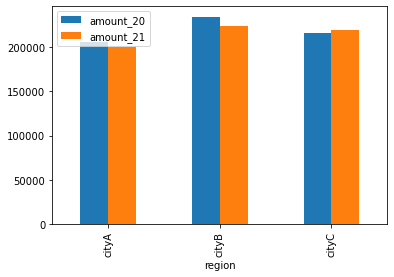

In [30]:
region_agg.plot(kind='bar')

### 결정된 인사이트
- female, young_adult, cityB 의 구매를 더 감소시킴
- 실직/ 수입감소

## 인사이트가 나오도록 데이터 조작
    - 여기에서 어떤 데이터를 조작해서 인사이트를 도출할 수 있도록 만드나?
        - 통합데이터를 조작


In [117]:
df_raw= pd.read_pickle('./dataset/integrated_purchase.pkl')
df_raw.head()

,orderno,date,day,time,cus_id,product,price,quantity,amount,gender,age,region
0,0,2020-01-01,Wed,03:35:15,733,20,14440,56,808640,0,72,0
1,1,2020-01-01,Wed,06:46:52,692,10,40740,49,1996260,1,63,2
2,2,2020-01-01,Wed,07:54:42,764,30,5520,2,11040,0,76,1
3,3,2020-01-01,Wed,09:10:55,459,30,8630,4,34520,1,31,0
4,4,2020-01-01,Wed,13:30:43,760,20,19970,6,119820,0,89,0


- 감소 조건
    - gender : 1
    - region : 1
    - age : 20~39

In [118]:
idx_dec = ((df_raw.gender == 1) | (df_raw.region == 1) | ((df_raw.age >= 20) & (df_raw.age < 40)))
df_raw[idx_dec]

,orderno,date,day,time,cus_id,product,price,quantity,amount,gender,age,region
1,1,2020-01-01,Wed,06:46:52,692,10,40740,49,1996260,1,63,2
2,2,2020-01-01,Wed,07:54:42,764,30,5520,2,11040,0,76,1
3,3,2020-01-01,Wed,09:10:55,459,30,8630,4,34520,1,31,0
5,5,2020-01-01,Wed,19:00:42,992,10,39220,86,3372920,1,55,0
6,6,2020-01-01,Wed,19:57:17,60,20,16410,84,1378440,1,77,2
...,...,...,...,...,...,...,...,...,...,...,...,...
9994,9994,2021-12-30,Thu,23:01:56,731,20,28750,18,517500,1,80,1
9995,9995,2021-12-31,Fri,04:16:40,89,20,28610,38,1087180,1,76,2
9996,9996,2021-12-31,Fri,11:57:21,837,30,9700,2,19400,1,38,1
9997,9997,2021-12-31,Fri,16:04:58,228,20,27980,89,2490220,1,64,2


#  감소시킬 raw를 boolean series 로 indexing

In [119]:
def decrease_by_for(by, for_): # for_ % 만큼의 값들에게 by %만큼감소 적용
    if randint(100) > for_: 
        return 1.0
    else:
        mul = ((100-by)/100) + np.random.uniform(0.0, 0.1)
        return round(mul, 3)
for  i in range(10):
    print(decrease_by_for(30, 70))

0.707
0.775
0.729
0.716
0.725
1.0
0.757
1.0
1.0
0.733


In [120]:
idx_female = (df_raw.gender == 1) & (df_raw.date.dt.year == 2021)
idx_cityB = (df_raw.region == 1 ) & (df_raw.date.dt.year == 2021)
idx_yAdult = ((df_raw.age >=20)&(df_raw.age<40)) & (df_raw.date.dt.year == 2021)

In [121]:
df_raw.price[idx_female] = (df_raw.price[idx_female]*decrease_by_for(40, 70)).round(-1)
df_raw.price[idx_cityB] = (df_raw.price[idx_cityB]*decrease_by_for(40, 70)).round(-1)
df_raw.price[idx_yAdult] = (df_raw.price[idx_yAdult]*decrease_by_for(40, 70)).round(-1)

- product, amount도 price에 맞게 변경

In [122]:
df_raw.product =pd.cut(x = df_raw.price, #데이터 배열
                         bins=[0, 10000, 30000, 50000], # 경계값 리스트
                         labels=[30, 20, 10], #bin 이름
                         include_lowest=True) #첫 경계값 포함

In [123]:
df_raw.amount = df_raw.price*df_raw.quantity
df_raw.loc[:,['price', 'quantity', 'amount']].head()

,price,quantity,amount
0,14440,56,808640
1,40740,49,1996260
2,5520,2,11040
3,8630,4,34520
4,19970,6,119820


In [124]:
df_raw.head()

,orderno,date,day,time,cus_id,product,price,quantity,amount,gender,age,region
0,0,2020-01-01,Wed,03:35:15,733,20,14440,56,808640,0,72,0
1,1,2020-01-01,Wed,06:46:52,692,10,40740,49,1996260,1,63,2
2,2,2020-01-01,Wed,07:54:42,764,30,5520,2,11040,0,76,1
3,3,2020-01-01,Wed,09:10:55,459,30,8630,4,34520,1,31,0
4,4,2020-01-01,Wed,13:30:43,760,20,19970,6,119820,0,89,0


## 정한 인사이트가 반영 되었는지 확인

### 요약 데이터 생성

In [126]:
df_cus = pd.read_pickle("./dataset/customers.pkl")
df_cus.head()

,cus_id,gender,age,region
0,0,0,38,0
1,1,0,61,2
2,2,1,38,2
3,3,0,30,2
4,4,0,49,1


In [127]:
df_moddata = pd.read_pickle('./dataset/modified_raw_data.pkl')
df_moddata.head()

,orderno,date,day,time,cus_id,product,price,quantity,amount,gender,age,region
0,0,2020-01-01,Wed,03:35:15,733,20,14440,56,808640,0,72,0
1,1,2020-01-01,Wed,06:46:52,692,10,40740,49,1996260,1,63,2
2,2,2020-01-01,Wed,07:54:42,764,30,5520,2,11040,0,76,1
3,3,2020-01-01,Wed,09:10:55,459,30,8630,4,34520,1,31,0
4,4,2020-01-01,Wed,13:30:43,760,20,19970,6,119820,0,89,0


In [128]:
cus_amount_20 = []
cus_amount_21 = []
for id_ in df_cus.cus_id:
    amount_20 = df_moddata.amount[(df_moddata.cus_id == id_) & (df_moddata.date.dt.year == 2020)].sum()
    amount_21 = df_moddata.amount[(df_moddata.cus_id == id_) & (df_moddata.date.dt.year == 2021)].sum()
    cus_amount_20.append(amount_20)
    cus_amount_21.append(amount_21)

In [129]:
df_cus['amount_20'] = cus_amount_20
df_cus['amount_21'] = cus_amount_21
df_cus['sales'] = np.where(df_cus.amount_20<df_cus.amount_21, 1, 0)

In [130]:
df_cus.gender.replace({0:'male', 1: 'female'}, inplace=True)
df_cus.gender = df_cus.gender.astype('category')

In [138]:
df_cus['age_cat'] = pd.cut(x = df_cus.age, #데이터 배열
                         bins=[17, 20, 40, 60, 89], # 경계값 리스트
                         labels=['teenager', 'young_adult', 'adult', 'senior'], #bin 이름
                         include_lowest=True) #첫 경계값 포함

In [132]:
df_cus.region.replace({0:'cityA', 1: 'cityB', 2:'cityC'}, inplace=True)
df_cus.region = df_cus.region.astype('category')

In [133]:
df_cus.amount_20 = (df_cus.amount_20/10000).round().astype('int')
df_cus.amount_21 = (df_cus.amount_21/10000).round().astype('int')

In [134]:
df_cus.head()

,cus_id,gender,age,region,amount_20,amount_21,sales,age_cat
0,0,male,38,cityA,805,0,0,young_adult
1,1,male,61,cityC,689,1075,1,adult
2,2,female,38,cityC,226,147,0,teenager
3,3,male,30,cityC,691,687,0,senior
4,4,male,49,cityB,402,297,0,senior


In [139]:
df_cus.age[df_cus.age_cat == 'young_adult'].describe()

count    292.000000
mean      30.986301
std        5.735267
min       21.000000
25%       26.000000
50%       31.000000
75%       36.000000
max       40.000000
Name: age, dtype: float64

### 요약 데이터 분석

In [160]:
df_sum = pd.read_pickle('./dataset/mod_sales_by_custom.pkl')
df_sum.head()

,cus_id,gender,age,region,amount_20,amount_21,sales,age_cat
0,0,male,38,cityA,805,0,0,young_adult
1,1,male,61,cityC,689,1075,1,senior
2,2,female,38,cityC,226,147,0,young_adult
3,3,male,30,cityC,691,687,0,young_adult
4,4,male,49,cityB,402,297,0,adult


- 성별 gender

In [161]:
grouped_gender = df_sum.groupby(['gender'])
print(round(grouped_gender.get_group('female').sales.mean(), 2))
print(round(grouped_gender.get_group('male').sales.mean(), 2))

0.38
0.42


In [162]:
agg_gender = grouped_gender.agg({'amount_20': 'sum', 'amount_21':'sum'})
agg_gender

,amount_20,amount_21
gender,,
female,329911,245549
male,327448,271983


<AxesSubplot:xlabel='gender'>

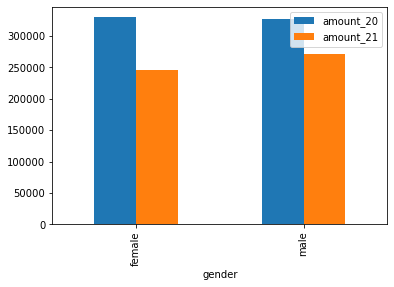

In [163]:
agg_gender.plot(kind = 'bar')

- 나이 age

In [170]:
grouped_agecat = df_sum.groupby('age_cat')

In [171]:
agecat_agg = grouped_agecat.agg({'amount_20': 'sum', 'amount_21':'sum'})
agecat_agg

,amount_20,amount_21
age_cat,,
teenager,39168,33058
young_adult,201558,115141
adult,162520,135948
senior,254113,233385


<AxesSubplot:xlabel='age_cat'>

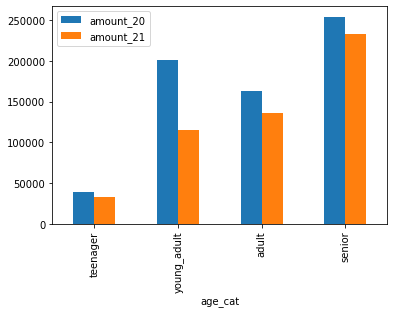

In [172]:
agecat_agg.plot(kind='bar')

- 지역 regioin

In [173]:
grouped_region = df_sum.groupby('region')
region_agg = grouped_region.agg({'amount_20': 'sum', 'amount_21':'sum'})
region_agg

,amount_20,amount_21
region,,
cityA,206493,179588
cityB,234789,139198
cityC,216077,198746


<AxesSubplot:xlabel='region'>

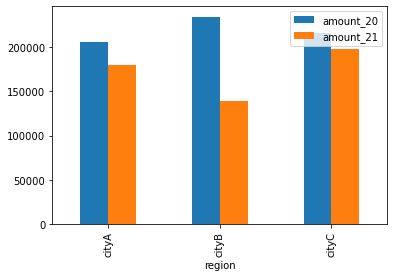

In [174]:
region_agg.plot(kind='bar')

- 의도대로 cityB가 감소하였다.

# 0714

- 뭔 비지니스 하는지 정하기
- 비지니스에 맞게 고객층도 정하기
- 80%학습 20% 평가
- 발표는 월요일 오후, 모두 발표